In [1]:
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 107kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=687b2c14519dd42b341c682701769812b3dca6fc89540dfdd7a1e522fb89b9ef
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
image=face_recognition.load_image_file("/content/drive/MyDrive/MLdatasets/Faces/Akshay Kumar_4.jpg")
Encodings=face_recognition.face_encodings(image)
print(Encodings)

[array([-5.57872094e-02,  1.22254618e-01,  2.32796073e-02,  7.47385621e-03,
       -2.48584971e-02, -2.56648175e-02, -5.78677952e-02, -8.15333202e-02,
        1.57573909e-01, -3.17120925e-02,  1.82984680e-01, -4.23929989e-02,
       -2.59787977e-01,  4.36837487e-02, -1.09852180e-01,  1.08392611e-01,
       -1.23051032e-01, -6.81483150e-02, -1.33463472e-01, -1.67171881e-01,
        2.52938978e-02,  8.21049362e-02,  9.70434844e-02,  3.48128639e-02,
       -1.68796733e-01, -2.59126753e-01, -4.62834165e-02, -1.91095367e-01,
       -2.01786291e-02, -1.05003908e-01, -4.52315621e-02, -1.47817442e-02,
       -2.55571544e-01, -1.09463722e-01, -1.82383880e-03,  3.31329666e-02,
       -6.05347790e-02,  3.97916436e-02,  1.66964903e-01,  3.27278823e-02,
       -1.21596023e-01,  1.30945027e-01,  6.92050308e-02,  2.73990571e-01,
        1.96573898e-01,  1.35961875e-01, -3.68593037e-02, -1.13338642e-01,
        8.04552510e-02, -2.43012801e-01,  5.94479367e-02,  1.49006933e-01,
        9.06201228e-02, 

In [3]:
import os
files=os.listdir("/content/drive/MyDrive/MLdatasets/Faces")
#print(files)
All_encodings=[]
cnt=0
for file in files:
  image=face_recognition.load_image_file("/content/drive/MyDrive/MLdatasets/Faces/"+file)
  Encodings=face_recognition.face_encodings(image)
  
  if len(Encodings)!=0:
    cnt+=1
    All_encodings.append(Encodings)
  if cnt>1000:
    break
print(All_encodings[1])

[array([-0.13148031,  0.06792289,  0.18454021, -0.1082755 , -0.22669341,
       -0.06307399, -0.04228718, -0.03025128,  0.21636552, -0.05699933,
        0.09873513, -0.0052549 , -0.33164704,  0.146898  , -0.10501738,
        0.12472437, -0.14841437, -0.17844635, -0.06187446, -0.06177533,
       -0.03732893,  0.03530375,  0.0317318 ,  0.03866576, -0.08867861,
       -0.37641817, -0.11380962, -0.04156204, -0.01957569, -0.06305836,
        0.07882746,  0.11208065, -0.19585674, -0.01972868,  0.00843314,
        0.08790134, -0.12995872, -0.14228044,  0.23293006,  0.03587726,
       -0.23763493, -0.05585862,  0.04969992,  0.29247195,  0.23772019,
        0.00249925,  0.06088126, -0.04278491,  0.18408562, -0.36631182,
       -0.0159908 ,  0.24630611,  0.02614824,  0.0757902 ,  0.12493438,
       -0.11250973,  0.04340945,  0.22466449, -0.14443523,  0.12905481,
        0.06377739, -0.1364567 ,  0.05139726, -0.09514966,  0.31497169,
        0.08563292, -0.1554894 , -0.04495354,  0.2350765 , -0.1

In [4]:
import numpy as np
print(np.linalg.norm(np.array(All_encodings[1])-np.array(All_encodings[61])))

0.8042096048428584


In [11]:
from sklearn.decomposition import PCA
All_encoding_reshaped=np.array(All_encodings).reshape((1001,128))
pca_encoding=PCA(n_components=20).fit(All_encoding_reshaped).transform(All_encoding_reshaped)
pca_graph=PCA(n_components=2).fit(All_encoding_reshaped).transform(All_encoding_reshaped)

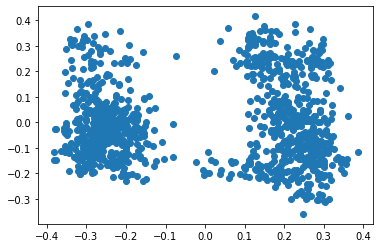

In [12]:
import matplotlib.pyplot as plt
plt.scatter(pca_graph[:,0],pca_graph[:,1],)

In [8]:
print(np.linalg.norm(pca_encoding[1]-pca_encoding[50]))

0.748985571073147


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
#clusterMd=DBSCAN(eps=0.4,min_samples=4)
clusterMd=KMeans(n_clusters=20)
#print(np.array(All_encodings).reshape((301,128)))
clusterMd.fit(pca_encoding)
print(clusterMd.labels_)
print("the silhouette score is "+str(silhouette_score(pca_encoding,clusterMd.labels_)))

[ 2 12 13 ... 19  4  1]
the silhouette score is 0.33414889974451484
